In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("C:\\Users\\prana\\Downloads\\4ab1e23f-3262-4bd3-adbf-f72f0119108b.csv")
data.head(20)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,4,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,5,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
5,6,2016-01-01,Lincoln,PM10,11,Good,NaN,NaN
6,7,2016-01-01,South Fayette,SO2,3,Good,NaN,NaN
7,8,2016-01-01,North Braddock,PM10B,12,Good,NaN,NaN
8,9,2016-01-01,Parkway East,CO,4,Good,NaN,NaN
9,10,2016-01-01,Flag Plaza,PM10,7,Good,NaN,NaN


In [46]:
# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty before finding the maximum AQI
if not data_2016.empty:
    # Find the neighborhood with the highest AQI in 2016
    highest_aqi_neighborhood = data_2016.loc[data_2016['index_value'].idxmax()]

    # Print the neighborhood and the corresponding AQI value
    print(f"The neighborhood with the highest AQI in 2016 is {highest_aqi_neighborhood['site']} with an AQI of {highest_aqi_neighborhood['index_value']}.")
else:
    print("No data available for the year 2016.")


The neighborhood with the highest AQI in 2016 is Lincoln with an AQI of 139.


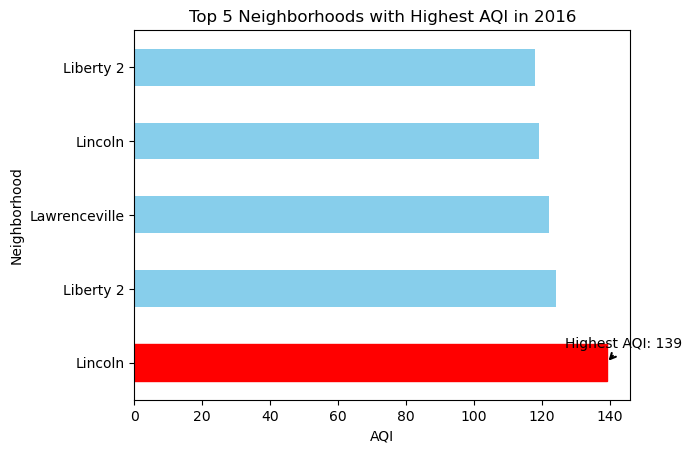

In [84]:
# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty
if not data_2016.empty:
    
    # Find the top 5 neighborhoods with the highest AQI in 2016
    highest_aqi = data_2016.nlargest(5, 'index_value')

    # Plot the top 5 highest AQI
    ax2 = highest_aqi.plot(kind='barh', x='site', y='index_value', color='skyblue', legend=False)
    most_aqi_idx = highest_aqi['index_value'].idxmax()
    most_aqi_value = highest_aqi['index_value'].max()
    ax2.patches[highest_aqi.index.get_loc(most_aqi_idx)].set_color('red')
    plt.annotate(f'Highest AQI: {most_aqi_value}', 
                 xy=(most_aqi_value, highest_aqi.index.get_loc(most_aqi_idx)),  
                 xytext=(most_aqi_value + 5, highest_aqi.index.get_loc(most_aqi_idx) + 0.2),  
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  
                 ha='center')
    plt.title('Top 5 Neighborhoods with Highest AQI in 2016')
    plt.xlabel('AQI')
    plt.ylabel('Neighborhood')
    plt.show()
else:
    print("No data available for the year 2016.")


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:\\Users\\prana\\Downloads\\4ab1e23f-3262-4bd3-adbf-f72f0119108b.csv")

# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty
if not data_2016.empty:
    # Drop duplicate sites
    data_2016_unique = data_2016.drop_duplicates(subset='site')

    # Find the top 5 neighborhoods with the lowest AQI in 2016 (safest AQI indexes)
    lowest_aqi = data_2016_unique.nsmallest(5, 'index_value')

    # Print the details of the top 5 neighborhoods with the lowest AQI
    print("Top 5 neighborhoods with the safest (lowest) AQI in 2016:")
    for index, row in lowest_aqi.iterrows():
        print(f"Neighborhood: {row['site']}, AQI: {row['index_value']}")

Top 5 neighborhoods with the safest (lowest) AQI in 2016:
Neighborhood: Flag Plaza, AQI: 0
Neighborhood: Lawrenceville 2, AQI: 1
Neighborhood: South Fayette, AQI: 3
Neighborhood: Liberty, AQI: 3
Neighborhood: Parkway East, AQI: 4


In [94]:
# Ensure the 'date' column is of type datetime
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the year 2016
data_2016 = data[data['date'].dt.year == 2016]

# Check if data_2016 is not empty
if not data_2016.empty:
    # Drop duplicate sites
    data_2016_unique = data_2016.drop_duplicates(subset='site')

    # Find the neighborhood with the lowest AQI in 2016 (safest AQI index)
    lowest_aqi_neighborhood = data_2016_unique.loc[data_2016_unique['index_value'].idxmin()]

    # Print the neighborhood and the corresponding AQI value
    print(f"The safest neighborhood in 2016 is {lowest_aqi_neighborhood['site']} with an AQI of {lowest_aqi_neighborhood['index_value']}.")
else:
    print("No data available for the year 2016.")


The safest neighborhood in 2016 is Flag Plaza with an AQI of 0.
